In [2]:
import pandas as pd
from collections import defaultdict
from Operators.evaluation import *

In [3]:
fitness_dfs = load_fitness_logs("fitness_logs")

Loaded 14 configurations from 'fitness_logs'


In [4]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teamscrossover=crossover_swap_whole_positionselection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection', 'POP=100 X

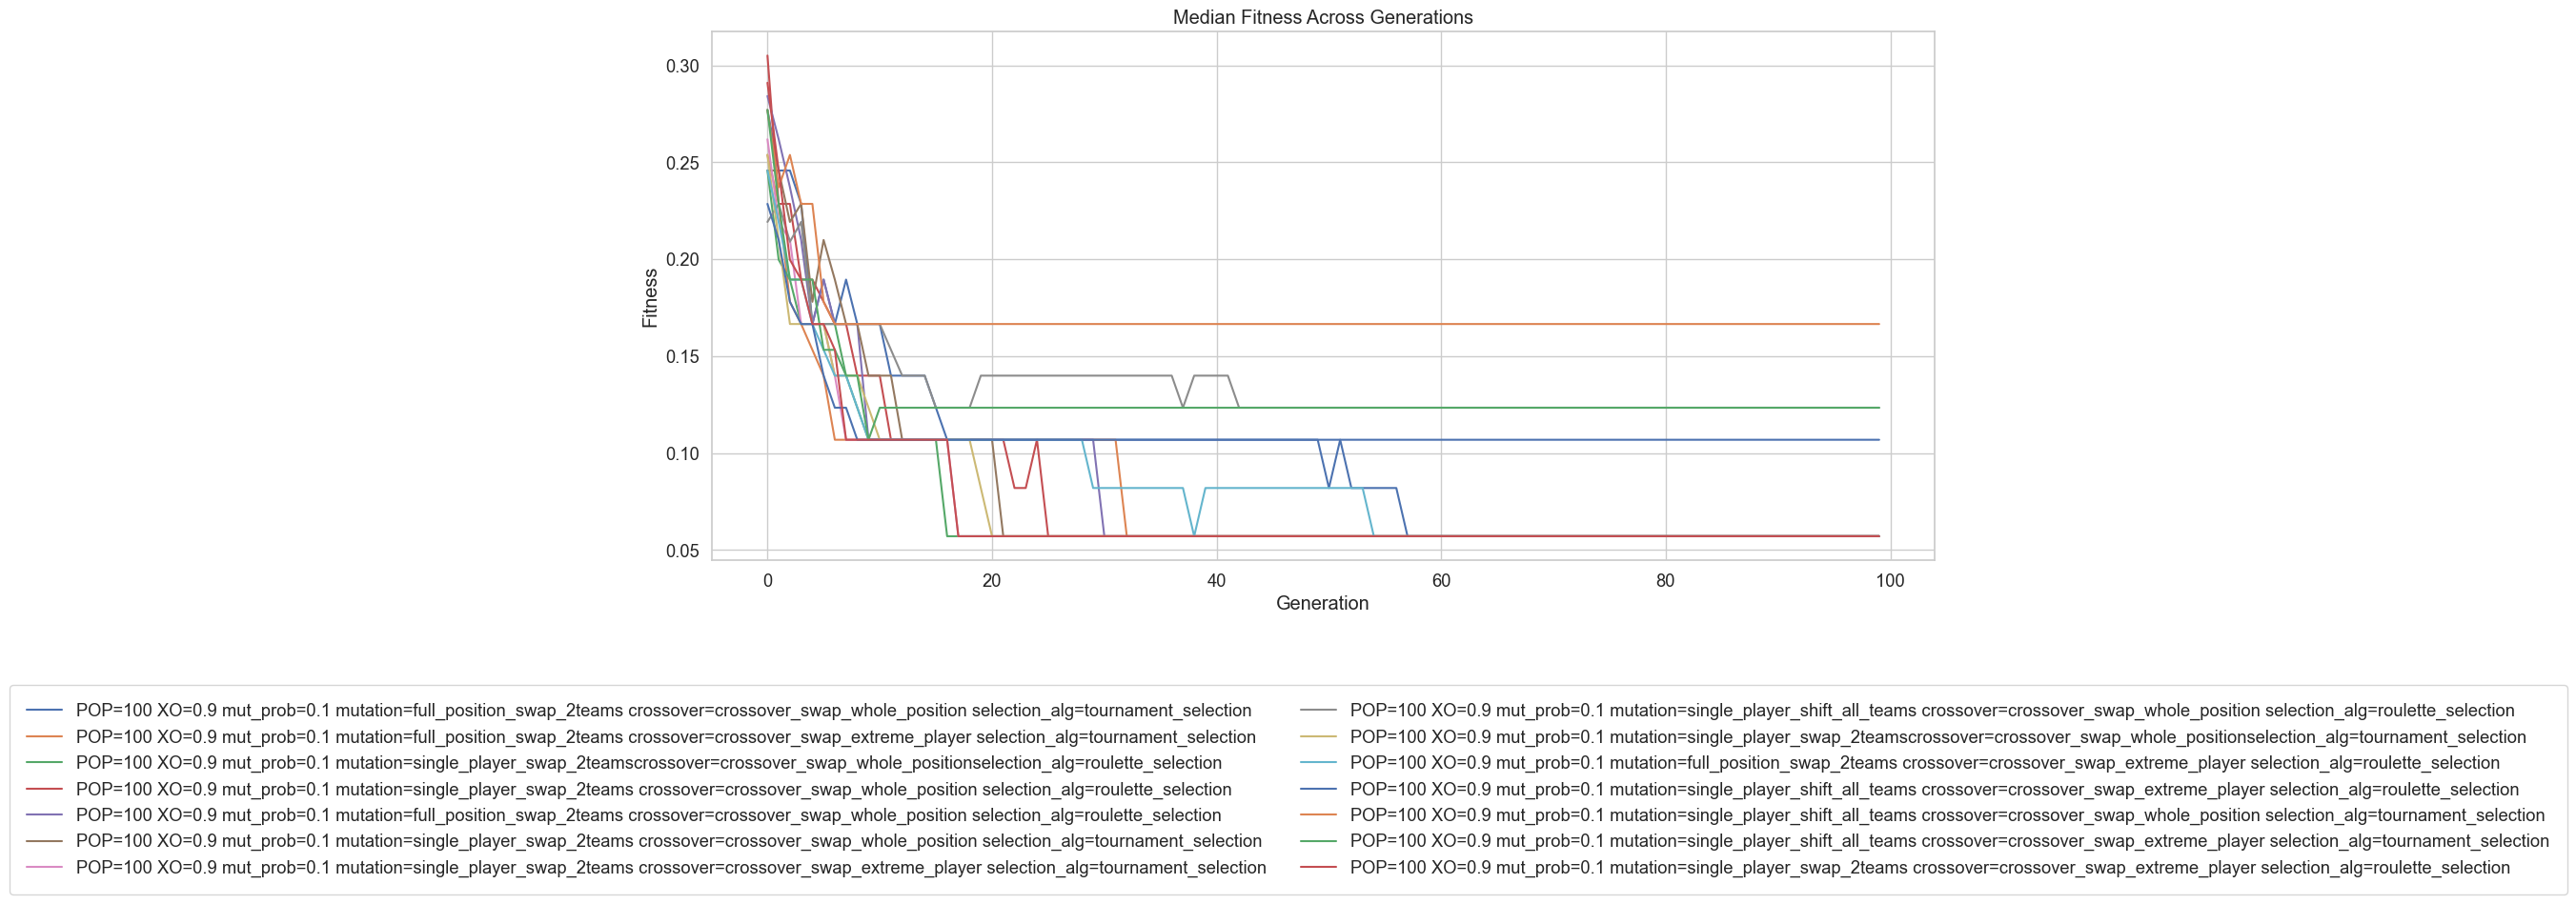

In [5]:
plot_median_fitness_over_gen(fitness_dfs)

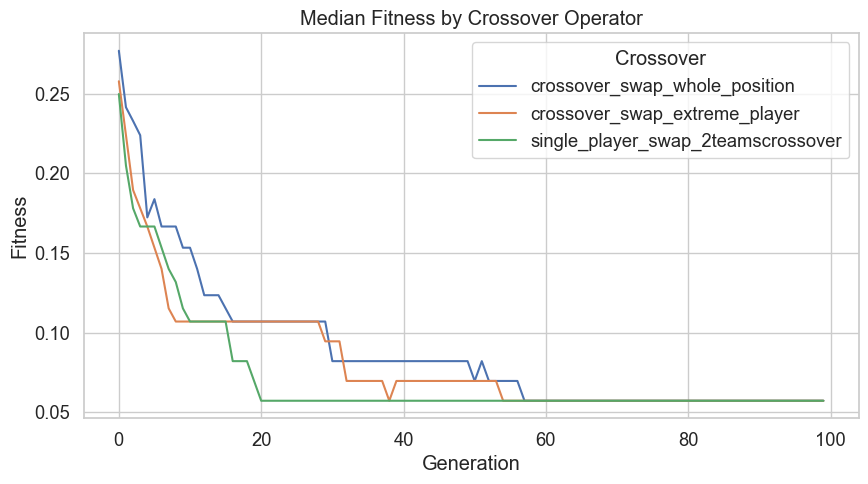

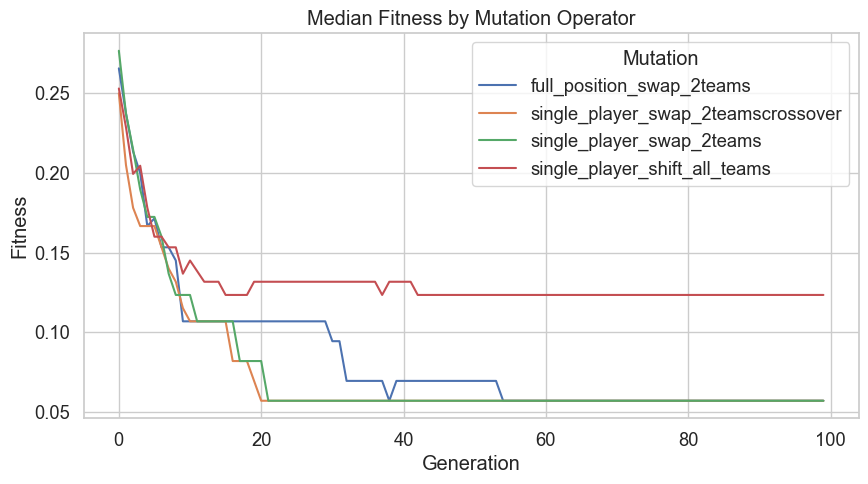

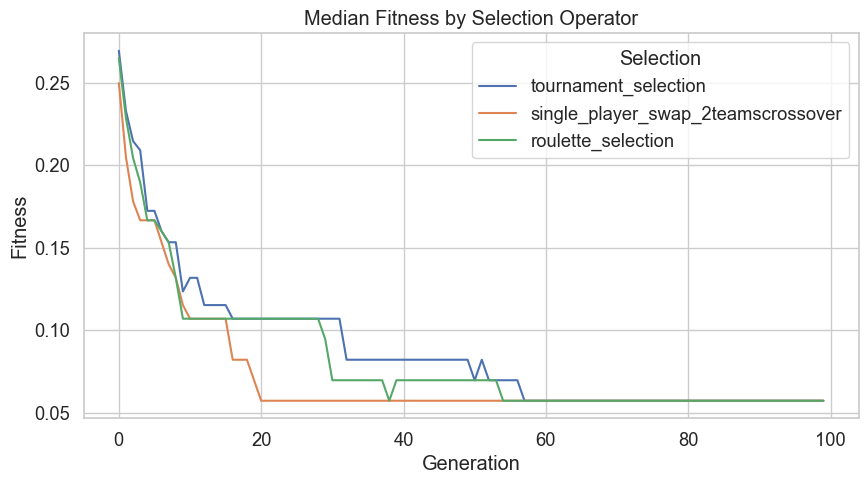

In [6]:
plot_median_fitness_by_operator("fitness_logs")


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [7]:
fitness_dfs = load_fitness_logs("fitness_logs")
labels, results = run_friedman_test_on_final_fitness(fitness_dfs)

Loaded 14 configurations from 'fitness_logs'

Friedman Test Results:
Test Statistic: 242.7301
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


### Analyzing only the best-performing configurations --> stil need to finish but i need results from gridsearch

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def plot_median_convergence_curves(summary_path="ga_summary.csv", fitness_log_folder="fitness_logs", top_n=5):
    # Step 1: Load summary file and get top N configs (lower median fitness = better)
    summary_df = pd.read_csv(summary_path)
    top_configs = summary_df.nsmallest(top_n, "median_fitness")

    # Step 2: Plot median curves for each top config
    plt.figure(figsize=(12, 6))

    for _, row in top_configs.iterrows():
        # Reconstruct the filename from the hyperparameters
        config_label = (
            f"POP={row['POP_SIZE']} "
            f"GEN={row['max_gen']} "
            f"XO={row['xo_prob']} "
            f"MUT={row['mut_prob']} "
            f"{row['mutation']}/"
            f"{row['crossover']}/"
            f"{row['selection_algorithm']}"
        )

        # Load convergence CSV
        filepath = Path(fitness_log_folder) / f"{config_label}.csv"
        if filepath.exists():
            df = pd.read_csv(filepath)
            median_curve = df.median(axis=0)
            plt.plot(median_curve.values, label=config_label, linewidth=2)
        else:
            print(f"Missing file: {filepath}")

    plt.title(f"Median Convergence Curves of Top {top_n} Configurations")
    plt.xlabel("Generation")
    plt.ylabel("Median Fitness")
    plt.grid(True)
    plt.legend(loc="upper right", fontsize="small")
    plt.tight_layout()
    plt.show()


In [9]:
plot_median_convergence_curves

<function __main__.plot_median_convergence_curves(summary_path='ga_summary.csv', fitness_log_folder='fitness_logs', top_n=5)>